# Problème de classification 

* L'objectif est déterminer si il y a un masque sur une image 

In [ ]:
!pip uninstall keras
!pip install keras==2.2.4



Uninstalling Keras-2.2.4:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.2.4.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? ERROR: Operation cancelled by user


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Chargement du dataset

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout


In [ ]:
path = '/content/drive/My Drive/MaskDataset/New Masks Dataset/'

In [ ]:
# Instanciation du generateur
imageGen = ImageDataGenerator(preprocess_input)

In [ ]:
# Recuperation par paquet des images
train_iterator = imageGen.flow_from_directory(
    path + 'Train',
    target_size = (1200,780),
    color_mode = 'rgb',
    batch_size=16,
    class_mode='categorical',
    shuffle= True
    )

validation_iterator = imageGen.flow_from_directory(
    path + 'Validation',
    target_size = (1200,780),
    color_mode = 'rgb',
    batch_size=16,
    class_mode='categorical',
    shuffle= True
    )

test_iterator = imageGen.flow_from_directory(
    path + 'Test',
    target_size = (1200,780),
    color_mode = 'rgb',
    batch_size=16,
    class_mode='categorical',
    shuffle= True
    )

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


# Fine-tuning 
* A partir d'un VGG16 
* Application de la technique du Freezing


In [ ]:
batch_size = 16 
epochs = 8 
nb_train_samples = 50
nb_validation_samples = 50

In [ ]:
model = VGG16(weights = 'imagenet',include_top=False)

In [ ]:
# create the base pre-trained model
base_model = VGG16(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5, name='avg_pool_dropout')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_iterator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_iterator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=1)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/8
3/3 [==============================] - 10s 3s/step - loss: 6.9105 - accuracy: 0.5833 - val_loss: 8.3772 - val_accuracy: 0.5208
Epoch 2/8
3/3 [==============================] - 11s 4s/step - loss: 2.1147 - accuracy: 0.8125 - val_loss: 0.8764 - val_accuracy: 0.7708
Epoch 3/8
3/3 [==============================] - 11s 4s/step - loss: 0.5873 - accuracy: 0.8125 - val_loss: 9.1301 - val_accuracy: 0.5000
Epoch 4/8
3/3 [==============================] - 10s 3s/step - loss: 1.1421 - accuracy: 0.8333 - val_loss: 1.8882 - val_accuracy: 0.6250
Epoch 5/8
3/3 [==============================] - 10s 3s/step - loss: 0.3750 - accuracy: 0.8958 - val_loss: 0.4714 - val_accuracy: 0.8125
Epoch 6/8
3/3 [==============================] - 10s 3s/step - loss: 0.6261 - accuracy: 0.8542 - val_loss: 1.2081 - val_accuracy: 0.6042
Epoch 7/8
3/3 [==============================] - 9s 3s/step - loss: 0.5093 - accuracy: 0.8750 - val_loss: 0.4885 - val_accuracy: 0.8542
Epoch 8/8
3/3 [===========================

# Monitoring 


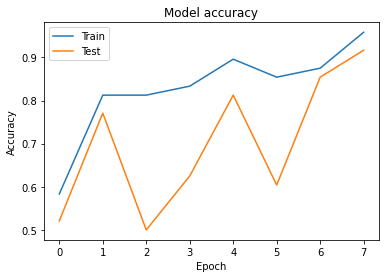

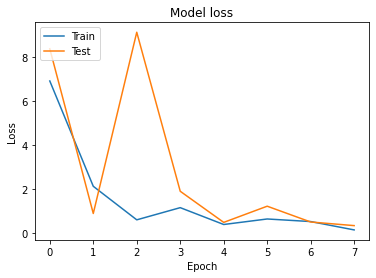

In [35]:
from matplotlib import pyplot as plt 
import numpy as np
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluation 

In [37]:
evaluation = model.evaluate(test_iterator)
print("[test loss , test acc]",evaluation)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


7/7 [==============================] - 10s 1s/step - loss: 0.2368 - accuracy: 0.8900
[test loss , test acc] [0.2368401736021042, 0.8899999856948853]
